<a href="https://colab.research.google.com/github/beriaacan/Web-Scraping-Applications/blob/main/IMDb%20Scraper%20and%20Web%20Application/IMDb_Anime_Scraper_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we will explore web scraping techniques to gather data from IMDb's website, focusing on the top 1000 "Anime" movies as rated by users.

We will use the BeautifulSoup library in Python to extract movie details such as the movie name, certificate rating, duration, genre, IMDb rating, metascore, director, stars, votes, gross earnings, and a brief plot summary.


The goal of this project is to collect valuable data from IMDb, which can be used for various analyses, recommendations, and insights. We will perform web scraping on multiple pages to gather comprehensive information about these top-rated movies. The final dataset will be used for further analysis and visualization.


#Installing required libraries

In [48]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
FOLDERNAME ='deneme/web scraping'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

In this cell, we install two essential Python packages:

Requests: This library allows us to make HTTP requests to web pages, which is crucial for fetching web content.

Beautiful Soup (beautifulsoup4): This is a powerful library for web scraping. It helps parse and extract data from HTML and XML documents.

We need these packages to scrape data from a website successfully. If you haven't installed these packages yet, you can run the following commands:

In [40]:
!pip install beautifulsoup4

In [41]:
!pip install requests

#Imports libraries

In [145]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In this cell, we import several Python libraries that are essential for various tasks in data analysis, visualization, and web scraping:

NumPy (np): NumPy is a fundamental library for numerical and mathematical operations. It provides support for working with arrays and matrices.

Pandas (pd): Pandas is a powerful library for data manipulation and analysis. It introduces data structures like DataFrames for easy handling of tabular data.

Matplotlib (plt): Matplotlib is a popular library for creating static, animated, or interactive visualizations in Python. It's commonly used for plotting charts and graphs.

Seaborn (sns): Seaborn is a data visualization library that works in conjunction with Matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics.

Requests: The 'requests' library enables making HTTP requests to fetch data from websites. It's essential for web scraping.

Beautiful Soup (from bs4 import BeautifulSoup): Beautiful Soup is a library for web scra

These libraries are crucial for our project, where we'll scrape data from a website, analyze it, and create visualizations to gain insights from the data. Providing explanations for library imports helps others understand the purpose and use of each library in your notebook.

#Web Scraping IMDb's

In this cell, we initialize an empty DataFrame, imdb_top1000, to store the scraped movie data. The DataFrame is structured with the following columns:


Movie Name: The name of the movie.

Certificate: The age certificate or rating of the movie.

Duration: The duration of the movie.

Genre: The genre(s) of the movie.

IMDb Rating: The IMDb rating of the movie.

Metascore: The Metascore rating of the movie (if available).

Director: The director(s) of the movie.

Stars: The main cast or stars of the movie.

Votes: The number of votes/ratings the movie has received on IMDb.

Grossed: The total gross earnings of the movie (if available).

Plot: A brief plot summary of the movie.

In [137]:
def scrape_imdb_data(page_num):
    url = f'https://www.imdb.com/search/keyword/?keywords=anime&sort=moviemeter,asc&mode=detail&page={page_num}&ref_=kw_nxt'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    movielist = soup.findAll('div', attrs={'class': 'lister-item mode-detail'})

    data_list = []
    for movie in movielist:
        moviename = movie.h3.a.text if movie.h3.a else 'NA'

        release_year = movie.h3.find('span', class_='lister-item-year text-muted unbold').text.replace('(', '').replace(')', '').replace(' ', 'OA') if movie.h3.find('span', class_='lister-item-year text-muted unbold') else 'NA'

        certificate_tag = movie.find("span", class_='certificate')
        certificate = certificate_tag.text if certificate_tag else None

        duration = movie.p.find('span', class_='runtime').text.replace(' min', '') if movie.p.find('span', class_='runtime') else 'NA'

        genre = movie.p.find('span', class_='genre').text.replace('\n', '').replace(' ', '') if movie.p.find('span', class_='genre') else 'NA'

        imdbrating = movie.find('div', attrs={'class': 'inline-block ratings-imdb-rating'}).text.replace('\n', '') if movie.find('div', attrs={'class': 'inline-block ratings-imdb-rating'}) else 'NA'

        #metascore_tag = movie.find("div", class_='inline-block ratings-metascore')
        #metascore = metascore_tag.text.strip().split()[0] if metascore_tag else None


        #director = movie.find("p", class_="").find("a", href=True).text


        #stars_tags = movie.find("p", class_="").find_all("a", href=True)
        #stars = [a.text for a in stars_tags[1:]]

        desc = movie.find('p', class_='').text.replace('\n', '') if movie.find('p', class_='') else 'NA'

        votes = movie.find('span', attrs={'name': 'nv'}).text if movie.find('span', attrs={'name': 'nv'}) else 'NA'


        #grossed_tag = movie.find("span", {"name": "nv"})
        #grossed = grossed_tag["data-value"] if grossed_tag else None

        data_list.append({
            'Movie Name': moviename,
            'Release Year': release_year,
            'Certificate': certificate,
            'Duration': duration,
            'Genre': genre,
            'IMDb Rating': imdbrating,
            #'Metascore': metascore,
            # 'Director': director,
            # 'Stars': stars,
            'Description': desc,
            'Votes': votes,
            # 'Grossed': grossed
        })

    return data_list


In [138]:
# Scraping IMDb data for multiple pages
final_data = []
for page_number in range(1, 11):
    final_data.extend(scrape_imdb_data(page_number))


In [139]:
# Creating a DataFrame
movies_df = pd.DataFrame(final_data)

# Display the data
movies_df

,Movie Name,Release Year,Certificate,Duration,Genre,IMDb Rating,Description,Votes
0,Jujutsu Kaisen,2020–OA,TV-MA,24,"Animation,Action,Adventure",8.6,A boy swallows a cursed talisman - the finger ...,"98,928"
1,Attack on Titan,2013–2023,TV-MA,24,"Animation,Action,Adventure",9.1,After his hometown is destroyed and is traumat...,"481,577"
2,One Piece,1999–OA,TV-14,24,"Animation,Action,Adventure",8.9,Monkey D. Luffy sets off on an adventure with ...,"213,517"
3,Demon Slayer: Kimetsu no Yaiba,2019–OA,TV-14,24,"Animation,Action,Adventure",8.6,A family is attacked by demons and only two me...,"138,674"
4,Vinland Saga,2019–2023,TV-MA,24,"Animation,Action,Adventure",8.8,Thorfinn pursues a journey with his father's k...,"64,273"
...,...,...,...,...,...,...,...,...
495,Pokémon the Movie: The Power of Us,2018,Not Rated,100,"Animation,Action,Adventure",6.2,Ash meets five residents who come together to ...,"2,893"
496,Little Witch Academia,2013,TV-Y7,26,"Animation,Short,Adventure",7.3,"Inspired by a magician named Shiny Chariot, th...","2,225"
497,Mobile Suit Gundam ZZ,1986–1987,TV-Y7,30,"Animation,Action,Comedy",6.8,Following the decisive battle against the Tita...,695
498,Mahoutsukai Reimeiki,2022–OA,TV-14,25,"Animation,Action,Adventure",5.8,A magician with zero magic is sent to investig...,358


# Save the DataFrame to a CSV file

In [140]:
# Save the DataFrame to a CSV file
csv_file_path = '/content/drive/My Drive/{}/anime_data.csv'.format(FOLDERNAME)
movies_df.to_csv(csv_file_path, index=False)


# Exploratory Data Analysis (EDA)

In this EDA, we'll be exploring various aspects of the movie data, including:

Summary Statistics: We'll begin by computing summary statistics for key numerical columns, such as IMDb ratings, Metascores, and more. These statistics will give us an overview of the data's central tendencies.

Data Visualization: Visualization is a powerful tool for understanding data. We'll create visualizations, such as histograms, bar plots, and scatter plots, to explore relationships and trends within the data. For example, we can visualize the distribution of IMDb ratings or explore the relationship between IMDb ratings and Metascores.

Genre Analysis: We'll analyze the distribution of movie genres in the top 1000 movies. Which genres are the most popular among the top-rated films, and how do they vary over time?

Director and Actor Insights: Who are the most prolific directors and actors in this list? We'll uncover insights into which directors and actors are associated with the highest-rated movies.

Movie Duration: What is the distribution of movie durations among the top-rated films? Are there any patterns in the duration of highly-rated movies?

User Votes and Gross Earnings: We'll explore the relationship between user votes and gross earnings for these movies. Do highly-rated movies tend to earn more?

Top-Rated Movies: Finally, we'll reveal the top-rated movies from the list and provide some information about them.

Our EDA will aim to answer these questions and more. Through this process, we hope to gain a deeper understanding of what makes a movie stand out among IMDb's top 1000 and to uncover interesting insights within the dataset.

In [141]:
# Display basic information about the DataFrame
print("DataFrame Info:")
movies_df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Movie Name    500 non-null    object
 1   Release Year  500 non-null    object
 2   Certificate   438 non-null    object
 3   Duration      500 non-null    object
 4   Genre         500 non-null    object
 5   IMDb Rating   500 non-null    object
 6   Description   500 non-null    object
 7   Votes         500 non-null    object
dtypes: object(8)
memory usage: 31.4+ KB


In [142]:
# Display basic statistics
print("\nBasic Statistics:")
movies_df.describe()




Basic Statistics:


,Movie Name,Release Year,Certificate,Duration,Genre,IMDb Rating,Description,Votes
count,500,500,438,500,500,500,500,500
unique,497,154,13,86,56,49,500,479
top,Astro Boy,2023–OA,TV-14,24,"Animation,Action,Adventure",7.3,A boy swallows a cursed talisman - the finger ...,NA
freq,3,40,184,152,148,29,1,9


In [143]:
# Count the number of missing values in each column
print("\nMissing Values:")
movies_df.isnull().sum()


Missing Values:


Movie Name       0
Release Year     0
Certificate     62
Duration         0
Genre            0
IMDb Rating      0
Description      0
Votes            0
dtype: int64

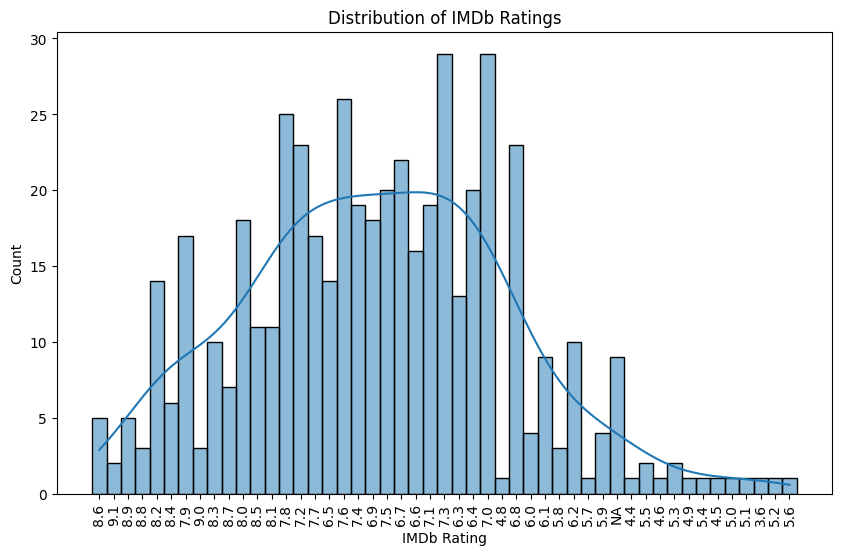

In [150]:
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['IMDb Rating'], bins=30, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.xticks(rotation=90)
plt.show()